In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import glorot_normal
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend() == 'tensorflow':
  K.set_image_dim_ordering('th')
  
# import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

In [3]:
!pip install keras_sequential_ascii

  Stored in directory: /root/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


In [5]:
core_num = mp.cpu_count()
print(core_num)

2


In [0]:
config = tf.ConfigProto(
    inter_op_parallelism_threads = core_num,
    intra_op_parallelism_threads = core_num,
)
sess = tf.Session(config = config)

In [0]:
from keras.datasets import cifar10

In [0]:
# declare variables

BATCH_NORM = False
batch_size = 64
num_classes = 10
epochs = 25
data_augmentation = True

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 22s 0us/step
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

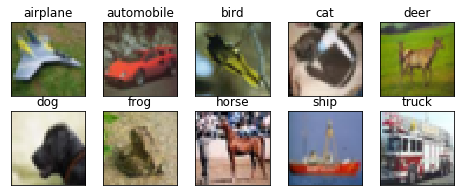

In [11]:
fig = plt.figure(figsize = (8, 3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    idx = np.where(y_train[:] == i)[0]
    features_idx = x_train[idx, ::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num, ::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# convert and preprocessing
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [0]:
# define the model
def base_model():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:], name='block1_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same', name='block1_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv3'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv3'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv3'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Flatten())

    model.add(Dense(4096))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4096, name='fc2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('softmax'))

    sgd = SGD(lr=0.0005, decay=0, nesterov=True)

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [14]:
cnn_n = base_model()
cnn_n.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 32, 32)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 32, 32)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 32, 32)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 32, 32)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 16, 16)        0         
_________________________________________________________________
block2_conv1 (Conv2D)

In [15]:
cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 56s 1ms/step - loss: 2.3026 - acc: 0.1035 - val_loss: 2.3026 - val_acc: 0.1226
Epoch 2/25
50000/50000 [==============================] - 50s 999us/step - loss: 2.3026 - acc: 0.1098 - val_loss: 2.3026 - val_acc: 0.1832
Epoch 3/25
50000/50000 [==============================] - 50s 992us/step - loss: 2.3026 - acc: 0.1097 - val_loss: 2.3025 - val_acc: 0.1563
Epoch 4/25
50000/50000 [==============================] - 50s 993us/step - loss: 2.3025 - acc: 0.1113 - val_loss: 2.3025 - val_acc: 0.1231
Epoch 5/25
50000/50000 [==============================] - 50s 997us/step - loss: 2.3025 - acc: 0.1172 - val_loss: 2.3025 - val_acc: 0.1725
Epoch 6/25
50000/50000 [==============================] - 50s 995us/step - loss: 2.3025 - acc: 0.1195 - val_loss: 2.3025 - val_acc: 0.1198
Epoch 7/25
50000/50000 [==============================] - 50s 997us/st

In [16]:
# Vizualizing model structure

sequential_model_to_ascii_printout(cnn_n)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      3   32   32
              Conv2D    \|/  -------------------      1792     0.0%
                relu   #####     64   32   32
              Conv2D    \|/  -------------------     36928     0.1%
                relu   #####     64   32   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     64   16   16
              Conv2D    \|/  -------------------     73856     0.2%
                relu   #####    128   16   16
              Conv2D    \|/  -------------------    147584     0.3%
                relu   #####    128   16   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####    128    8    8
              Conv2D    \|/  -------------------    295168     0.7%
                relu   #####    256    8    8
              Conv2D    \|/  -------------------    590080     1.3%
              

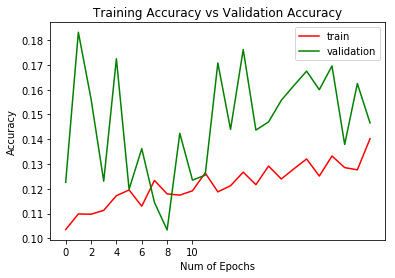

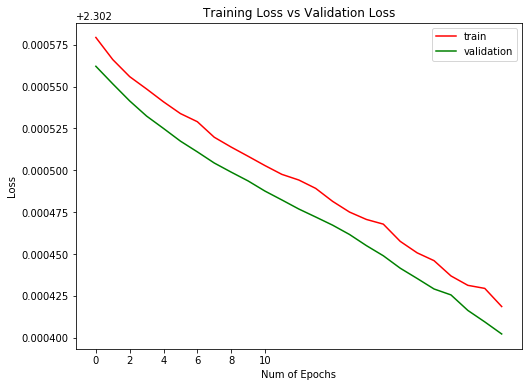

Accuracy: 14.66%


In [17]:
# Plots for trainng and testing process: loss and accuracy

plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[  0   0   0   0 525   0   0   0 461  14]
 [  0   0   0   0 746   0   0   0 222  32]
 [  0   0   0   0 885   0   0   0 106   9]
 [  0   0   0   0 925   1   0   0  52  22]
 [  0   0   0   0 956   0   0   0  35   9]
 [  0   0   0   0 939   2   0   0  54   5]
 [  0   0   0   0 961   2   0   0  29   8]
 [  0   0   0   0 876   2   0   0  84  38]
 [  0   0   0   0 580   2   0   0 400  18]
 [  0   0   0   0 628   0   0   0 264 108]]


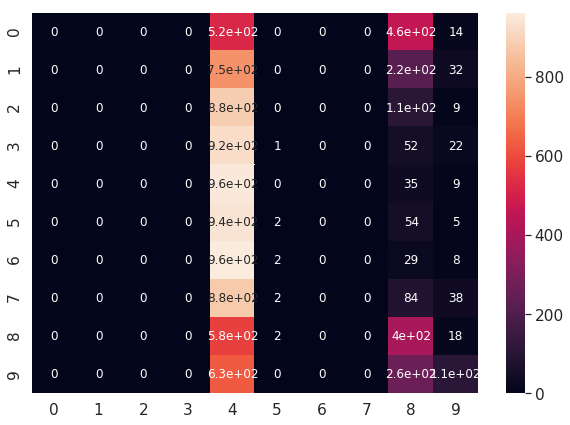

In [18]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()